## Comandos Linux
Comandos usados para extraer el dataset de Google Drive


In [ ]:
!unzip "/content/drive/MyDrive/ava.zip" -d "/"

## Inicio del código de Python

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
import numpy as np
import copy
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
densenet_model = tf.keras.applications.DenseNet201(include_top=False, input_shape=(256,256,3), weights='imagenet')

74842112/74836368 [==============================] - 1s 0us/step


In [ ]:
densenet_model.summary()

In [ ]:
model = Sequential()
model.add(densenet_model)
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(units=264, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=264, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=14, activation='softmax'))

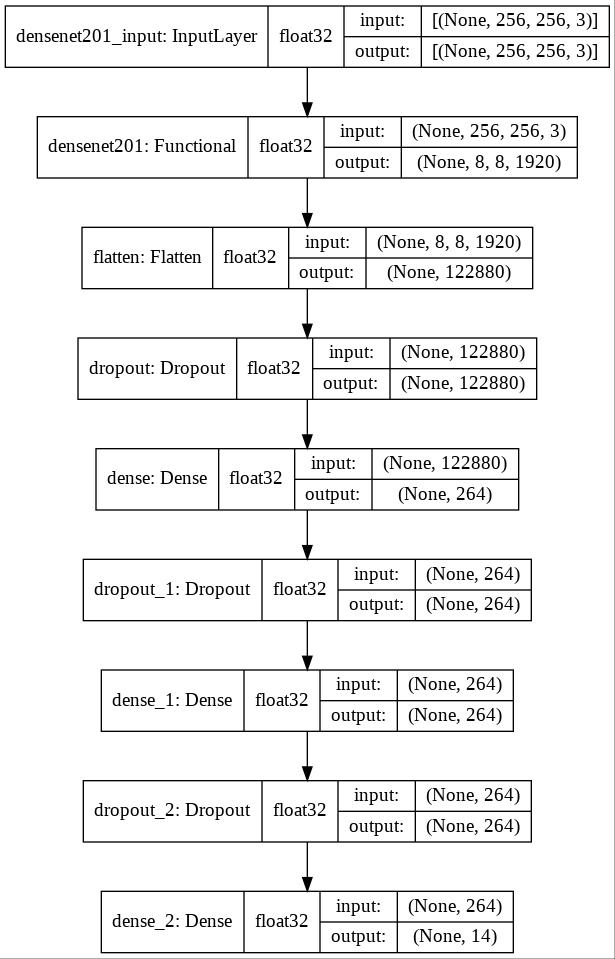

In [ ]:
tf.keras.utils.plot_model(model, show_dtype=True, show_shapes=True, to_file='model.jpg')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 8, 8, 1920)        18321984  
_________________________________________________________________
flatten_1 (Flatten)          (None, 122880)            0         
_________________________________________________________________
dropout (Dropout)            (None, 122880)            0         
_________________________________________________________________
dense (Dense)                (None, 264)               32440584  
_________________________________________________________________
dropout_1 (Dropout)          (None, 264)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 264)               69960     
_________________________________________________________________
dropout_2 (Dropout)          (None, 264)              

In [ ]:
train_path = '/content/ava1/train'
valid_path = '/content/ava1/valid'
test_path = '/content/ava1/test'

In [ ]:
train_batches = ImageDataGenerator(rescale=1.0/255.0) \
                .flow_from_directory(directory=train_path, target_size=(256,256), batch_size=16)
valid_batches = ImageDataGenerator(rescale=1.0/255.0) \
                .flow_from_directory(directory=valid_path, target_size=(256,256), batch_size=16)
test_batches = ImageDataGenerator(rescale=1.0/255.0) \
                .flow_from_directory(directory=test_path, target_size=(256,256), batch_size=100, shuffle=False)

Found 9011 images belonging to 14 classes.
Found 1121 images belonging to 14 classes.
Found 1121 images belonging to 14 classes.


In [ ]:
print(train_batches.class_indices)
print(valid_batches.class_indices)
print(test_batches.class_indices)

{'complementary_colors': 0, 'dutones': 1, 'hdr': 2, 'image_grain': 3, 'light_on_white': 4, 'long_exposure': 5, 'macro': 6, 'motion_blur': 7, 'negative_image': 8, 'rule_of_thirds': 9, 'shallow_dof': 10, 'silhouttes': 11, 'soft_focus': 12, 'vanishing_point': 13}
{'complementary_colors': 0, 'dutones': 1, 'hdr': 2, 'image_grain': 3, 'light_on_white': 4, 'long_exposure': 5, 'macro': 6, 'motion_blur': 7, 'negative_image': 8, 'rule_of_thirds': 9, 'shallow_dof': 10, 'silhouttes': 11, 'soft_focus': 12, 'vanishing_point': 13}
{'complementary_colors': 0, 'dutones': 1, 'hdr': 2, 'image_grain': 3, 'light_on_white': 4, 'long_exposure': 5, 'macro': 6, 'motion_blur': 7, 'negative_image': 8, 'rule_of_thirds': 9, 'shallow_dof': 10, 'silhouttes': 11, 'soft_focus': 12, 'vanishing_point': 13}


In [ ]:
imgs, labels = next(train_batches)

In [ ]:
# This function will plot images in the form of a grid with 1 row and 10 columns where
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

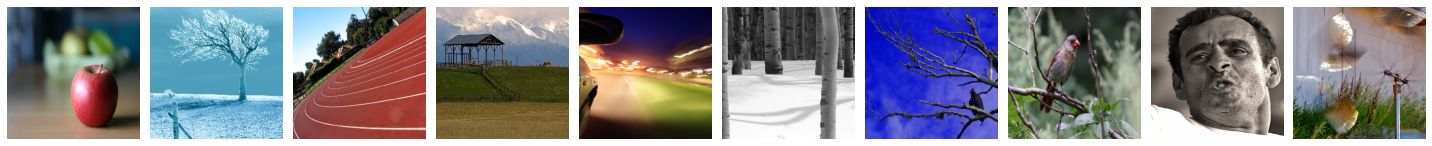

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [ ]:
plotImages(imgs)
print(labels)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 8, 8, 1920)        18321984  
_________________________________________________________________
flatten_1 (Flatten)          (None, 122880)            0         
_________________________________________________________________
dropout (Dropout)            (None, 122880)            0         
_________________________________________________________________
dense (Dense)                (None, 264)               32440584  
_________________________________________________________________
dropout_1 (Dropout)          (None, 264)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 264)               69960     
_________________________________________________________________
dropout_2 (Dropout)          (None, 264)              

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0000065), loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(curve='PR')])

In [ ]:
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=1)

Epoch 1/20
359/564 [==================>...........] - ETA: 35s - loss: 3.1763 - accuracy: 0.1055 - auc: 0.0828

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 211288080 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 131073 bytes but only got 10470. Skipping tag 582
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 196867 bytes but only got 10474. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 5. 
  warnings.warn(str(msg))


473/564 [========================>.....] - ETA: 15s - loss: 3.0990 - accuracy: 0.1078 - auc: 0.0845

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11046 bytes but only got 749. Skipping tag 700
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 9664 bytes but only got 749. Skipping tag 34377
  " Skipping tag %s" % (size, len(data), tag)


564/564 [==============================] - 145s 192ms/step - loss: 3.0511 - accuracy: 0.1095 - auc: 0.0857 - val_loss: 2.4612 - val_accuracy: 0.2293 - val_auc: 0.1933
Epoch 2/20
564/564 [==============================] - 102s 180ms/step - loss: 2.5193 - accuracy: 0.1706 - auc: 0.1377 - val_loss: 2.2084 - val_accuracy: 0.3113 - val_auc: 0.3132
Epoch 3/20
564/564 [==============================] - 102s 181ms/step - loss: 2.3258 - accuracy: 0.2356 - auc: 0.2217 - val_loss: 2.0139 - val_accuracy: 0.3747 - val_auc: 0.3860
Epoch 4/20
564/564 [==============================] - 101s 180ms/step - loss: 2.1554 - accuracy: 0.2867 - auc: 0.2913 - val_loss: 1.8520 - val_accuracy: 0.4371 - val_auc: 0.4363
Epoch 5/20
564/564 [==============================] - 102s 181ms/step - loss: 1.9985 - accuracy: 0.3529 - auc: 0.3582 - val_loss: 1.7239 - val_accuracy: 0.4674 - val_auc: 0.4717
Epoch 6/20
564/564 [==============================] - 103s 183ms/step - loss: 1.8406 - accuracy: 0.4031 - auc: 0.4225 - v

In [ ]:
model.save('ava_14_5781.h5')

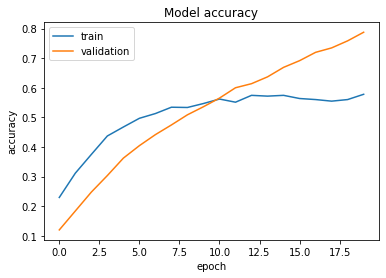

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('DenseNet201 DROPOUT Adam0000065.jpg')
plt.show()

In [ ]:
predictions = model.predict(x=test_batches, verbose=1)

12/12 [==============================] - 15s 840ms/step


In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize

Y = label_binarize(test_batches.classes, [0,1,2,3,4,5,6,7,8,9,10,11,12,13])
n_classes = Y.shape[1]
avP = average_precision_score(y_true=Y, y_score=predictions) # Average none to see result per class
print(avP)
print(type(avP))
print(avP.size)

0.5977634526918327
<class 'numpy.float64'>
1
